Pra rodar as células usa o comando SHIFT + ENTER

O objetivo dessa primeira célula é criar permissão pra utilizar o drive. 
Quando rodar a célula será gerado um link. 
Basta clicar no link e fazer login com sua conta do google.
Copia o texto que aparecer e cola no na caixa que aparecer depois dessa célula. ENTER

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
from collections import OrderedDict, Counter
import os
import networkx as nx
import matplotlib.pyplot as plt
from nltk import word_tokenize
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Nessa parte escolhemos a data que será utilizada. Fica a vontade pra mudar.

In [3]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Utils/Análise 2020/tweets_total.csv', encoding = 'utf-8')   

df = df[(df['date'] > '2016-04-01 00:00:00') & (df['date'] < '2016-06-30 09:00:00')]
df = df.dropna()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
def palavra(x):
  x = x.split()
  if 'bilhões' in x:
    return True
  else:
    return False

df['tweet'].apply(palavra)

df[df['tweet'].apply(palavra)].to_excel('/content/drive/My Drive/Projeto Ana/Tweets_bilhoes.xlsx')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df[df['username']=='ale_lozetti']
#print(df[df['Unnamed: 0']=='135148']['tweet'].values[0])

,Unnamed: 0,id,date,username,name,tweet,retweets_count,likes_count
353898,135148,7.218641e+17,2016-04-18,ale_lozetti,Alexandre Lozetti,Não importa o que eu pense do governo Dilma (n...,2612.0,2140.0


In [ ]:
df.sort_values(by = 'retweets_count', ascending=False).head(100)

,Unnamed: 0,id,date,username,name,tweet,retweets_count,likes_count
353898,135148,7.218641e+17,2016-04-18,ale_lozetti,Alexandre Lozetti,Não importa o que eu pense do governo Dilma (n...,2612.0,2140.0
328160,109418,7.407173e+17,2016-06-09,umvesgo,joao,governo dilma / governo temer pic.twitter.com...,1943.0,1171.0
270772,106237,7.464231e+17,2016-06-24,dilmabr,Dilma Rousseff,A grande herança negativa do governo Dilma é o...,1674.0,2748.0
338034,119293,7.318862e+17,2016-05-15,bentoinhawaii,BENT0,Como era a notícia no governo Dilma / Como é a...,1516.0,846.0
271084,106549,7.454714e+17,2016-06-22,lolminati,karina,governo dilma: rihanna veio duas vezes no bras...,1220.0,623.0
354324,135573,7.218038e+17,2016-04-17,venanciovinii,Vinícius,as pessoas têm a ousadia de falar que o govern...,1090.0,423.0
356453,137702,7.208168e+17,2016-04-15,ronaldocaiado,Ronaldo Caiado,STF jogou uma pá de cal no governo Dilma e ain...,802.0,1063.0
331577,112836,7.358296e+17,2016-05-26,mendoncafilho,Mendonça Filho,Recebi o MEC com cortes no Orçamento por decis...,740.0,926.0
351741,132994,7.230173e+17,2016-04-21,blogdopim,Felipe Moura Brasil,"Incapaz de se defender das acusações, governo ...",691.0,974.0
332995,114254,7.347481e+17,2016-05-23,portaldaband,Band.com.br,"Minha Casa, Minha Vida deu R$ 1 bilhão a MTST ...",680.0,423.0


###Palavras mais frequentes

In [ ]:
def word_transform(words):
    words = words.split()
    total = [x.lower() for x in words]
    manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                             'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                             'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','pictwittercom','dia','mil','pra',
                             'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
            'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
            'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog', '-', '@','"','...','dilma']
    stop_words = stopwords.words('portuguese')
    for i in manual_list_stop_words:
        stop_words.append(i)
    
    total = [x for x in total if x not in stop_words]
    total = [re.sub(r'[,\.!?()]', '', x) for x in total]
    total = [x for x in total if not re.search(r"\d", x)]
    
    long_string = (" ").join(total)
    return long_string

In [ ]:
df['tweet'] = df['tweet'].apply(word_transform)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


In [ ]:
import operator
lista = df['tweet'].values.tolist()

flat_list = reduce(operator.concat, lista)
flat_list = flat_list.split()

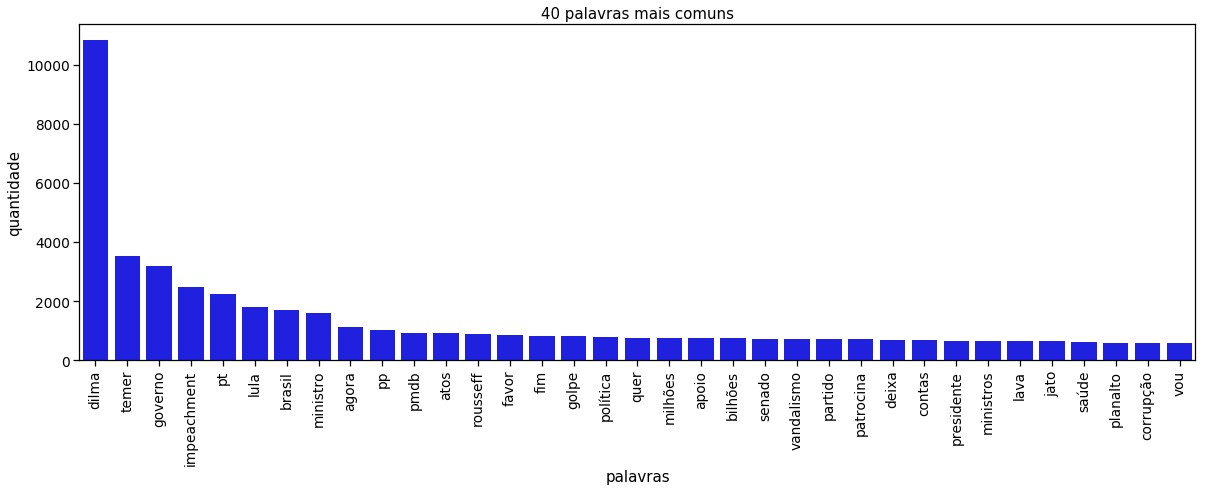

In [ ]:
def plot_n_most_common_words(count_data, count_vectorizer, n):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n]
    del count_dict[1]
    del count_dict[9]
    del count_dict[14]
    del count_dict[15]
    del count_dict[-15]

    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(20, 10/1.6180))
    plt.subplot(title='{} palavras mais comuns'.format(n))
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, color = 'blue')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('palavras')
    plt.ylabel('quantidade')
    plt.show()

count_vectorizer = CountVectorizer()

count_data = count_vectorizer.fit_transform(flat_list)
                                               
plot_n_most_common_words(count_data, count_vectorizer,40)

### Gráfico de centralidade e co-ocorrência

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Análise 2020/tweets_total.csv', encoding = 'utf-8')

df = df[(df['date'] > '2016-04-01 00:00:00') & (df['date'] < '2016-06-30 09:00:00')]
df = df.dropna()

In [ ]:
df_centralidade = df[['tweet']]

In [ ]:
df_centralidade['tweet'] = df_centralidade['tweet'].apply(word_transform)

texto_sem_tags = ' '.join(df_centralidade['tweet'].tolist())


l_sem_stopwords = texto_sem_tags.split()
t_sem_stopwords = u' '.join(l_sem_stopwords)

lista_tweets = df_centralidade['tweet'].tolist()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def polariza_counter(dicionario, df1, df2):
    polaridades = []
    fator_div = 0
    ausentes = []
    for palavra, frequencia in dicionario.items():
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p] * frequencia)
            fator_div += frequencia
        elif p in df2.index:
            polaridades.append(df2.polaridade[p] * frequencia)
            fator_div += frequencia
        else:
            ausentes.append((palavra,frequencia))
    num_pal = len(dicionario)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(fator_div)

    return polaridade, ausentes

freq_words = Counter(l_sem_stopwords)

w_items = freq_words.items()
w_items.sort(key = lambda wc: wc[1])

datapath = '/content/drive/My Drive/Projeto Ana/Análise 2020/'
oplexicon = 'oplexicon_v3.0/lexico_v3.0.txt'
sentilex1 = 'SentiLex-PT02/SentiLex-lem-PT02.txt'
sentilex2 = 'SentiLex-PT02/SentiLex-flex-PT02.txt'

df_o = pd.read_csv(os.path.join(datapath,oplexicon), header=None, encoding='utf-8', usecols=[0,2], names=[u'palavra',u'polaridade'])
df_o.drop_duplicates(subset=[u'palavra'],  inplace=True)
df_o = df_o.set_index(u'palavra')

df_s1 = pd.read_csv(os.path.join(datapath,sentilex1), header=None, encoding='utf-8', delimiter='.', names=[u'palavra',u'polaridade'])
conserta_pol1 = lambda x: int(x.split(';')[2].split('=')[1])
df_s1.polaridade = df_s1.polaridade.apply(conserta_pol1)
df_s1.drop_duplicates(subset=[u'palavra'], inplace=True)
df_s1 = df_s1.set_index(u'palavra')

In [ ]:
def all_pairs(items):
    pairs = []
    nitems = len(items)
    for i, wi in enumerate(items):
        for j in range(i+1, nitems):
            pairs.append((wi, items[j]))
    return pairs

def co_occurrences(lines, words):
 
    wpairs = all_pairs(words)

    co_occur = {}
    for w1, w2 in wpairs:
        rx = re.compile('%s .*%s|%s .*%s' % (w1, w2, w2, w1))
        co_occur[w1, w2] = sum([1 for line in lines if rx.search(line)])

    return co_occur

def co_occurrences_graph(word_hist, co_occur, cutoff=0):
    g = nx.Graph()
    for word, count in word_hist:
        g.add_node(word, count=count)
    for (w1, w2), count in co_occur.iteritems():
        if count<=cutoff:
            continue
        g.add_edge(w1, w2, weight=count)
    return g

In [ ]:
n_nodes = 12
popular = w_items[-n_nodes:]
pop_words = [wc[0] for wc in popular]
co_occur = co_occurrences(lista_tweets, pop_words)
wgraph = co_occurrences_graph(popular, co_occur, cutoff=1)
wgraph = list(nx.connected_component_subgraphs(wgraph))[0]
centrality = nx.eigenvector_centrality_numpy(wgraph)
c = centrality.items()
c.sort(key=lambda x:x[1], reverse=True)

In [ ]:
rad0 = 0.2
def rescale_arr(arr, amin, amax):
    
    m = arr.min()
    M = arr.max()
 
    s = float(amax-amin)/(M-m)
    d = amin - s*m

    
    return np.clip(s*arr+d,amin,amax)

def plot_graph(wgraph, pos=None, fig=None, title=None):
 
    edge_min_width= 3
    edge_max_width= 12
    label_font = 16
    node_font = 18
    node_alpha = 0.4
    edge_alpha = 0.55
    edge_cmap = plt.cm.Spectral

 
    if fig is None:
        fig, ax = plt.subplots()
    else:
        ax = fig.add_subplot(111)
    fig.subplots_adjust(0,0,1)

  
    sizes = []
    degrees = []
    for n, d in wgraph.nodes(data=True):
        sizes.append(d['count'])
        degrees.append(wgraph.degree(n))

    sizes = rescale_arr(np.array(sizes, dtype=float), 100, 1000)

    
    pos = nx.spring_layout(wgraph) if pos is None else pos
    labels = {}
    width = []
    for n1, n2, d in wgraph.edges(data=True):
        w = d['weight']
        labels[n1, n2] = w
        width.append(w)

    width = rescale_arr(np.array(width, dtype=float), edge_min_width, 
                        edge_max_width)

    nx.draw_networkx_nodes(wgraph, pos, node_size=sizes, node_color=degrees,
                           alpha=node_alpha)
    nx.draw_networkx_edges(wgraph, pos, width=width, edge_color=width,
                           edge_cmap=edge_cmap, alpha=edge_alpha)
    nx.draw_networkx_edge_labels(wgraph, pos, edge_labels=labels, 
                                 font_size=label_font)
    nx.draw_networkx_labels(wgraph, pos, font_size=node_font, font_weight='bold')
    if title is not None:
        ax.set_title(title, fontsize=label_font)
    ax.set_xticks([])
    ax.set_yticks([])

    # Mark centrality axes
    kw = dict(color='k', linestyle='-')
    cross = [ax.axhline(0, **kw), ax.axvline(rad0, **kw)]
    [ l.set_zorder(0) for l in cross]
    
def centrality_layout(wgraph, centrality):

    cent = sorted(centrality.items(), key=lambda x:float(x[1]), reverse=True)
    nodes = [c[0] for c in cent]
    cent  = np.array([float(c[1]) for c in cent])
    rad = (cent - cent[0])/(cent[-1]-cent[0])
    rad = rescale_arr(rad, rad0, 1)
    angles = np.linspace(0, 2*np.pi, len(centrality))
    layout = {}
    for n, node in enumerate(nodes):
        r = rad[n]
        th = angles[n]
        layout[node] = r*np.cos(th), r*np.sin(th)
    return layout

Nessa parte escolhemos qual palavra será o centro do Grafo. Pode escolher outra se for do interesse.

Graph visualization for query:


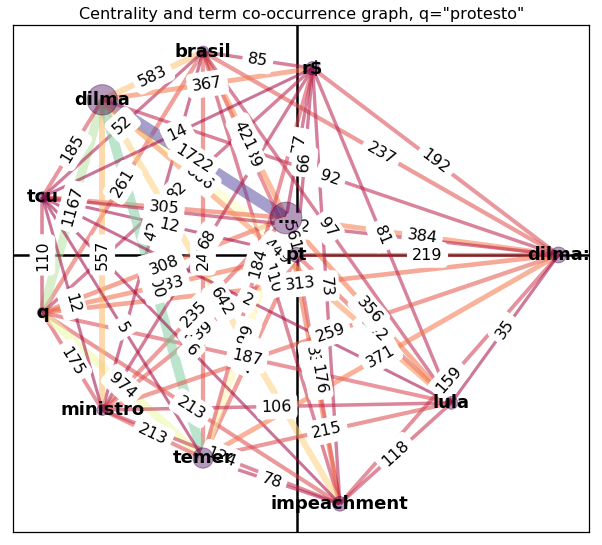

In [ ]:
query = 'protesto'
print "Graph visualization for query:"
plot_graph(wgraph, centrality_layout(wgraph, centrality), 
           plt.figure(figsize=(8,8)), 
           title = u'Centrality and term co-occurrence graph, q="{}"'.format(query))

### n-grams e dispersão lexical

In [ ]:
q = u'dilma'

In [ ]:
tokens = word_tokenize(t_sem_stopwords) 
text = nltk.Text(tokens)
text.concordance(q, width=130, lines=10)

Displaying 10 of 11187 matches:
                                                              dilma @ pastormalafaia coi coincidência não maiores defensores maio
                                                              dilma ato bravura pastel fhc real reais olhem olhem fotos atos dilm
ilma ato bravura pastel fhc real reais olhem olhem fotos atos dilma vc identifica mais # foratemer … @ gaudtorquato fez não podri
fez não podridão tomou conta país veio ele origem descalabros dilma também olimpíada apenas propósito ex dilma roubar faturar gan
origem descalabros dilma também olimpíada apenas propósito ex dilma roubar faturar ganhar $ $ $ $ dó atletas … dilma : rihanna ve
propósito ex dilma roubar faturar ganhar $ $ $ $ dó atletas … dilma : rihanna veio brasil duas vezes temer : rihanna cancela show
w analisar brasil vê n quer resultado incompetente fracassado dilma … fim 'ruindade ' temer se confirmar nunca pior 'ruindade ' d
a … fim 'ruindade ' temer se confirmar nunca pior 'ruindad

In [ ]:
max_items = 50
freq_min_b = 10
freq_min_t = 6

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(text)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print a, b

batuta entusiasmo
reitor ufrgs
secreto isarael
encorpa viés
jerônimo goergen
desnuda truculência
aldo rebelo
antecipar encont
largam 'trambique
ufrgs promove
mário magalhães
diego casagrande
isarael caga
equivalem praia
modal rodoviário
provisórias agravam
cogitar decretação
conteúdofrente apurações
homologações recentes
contagem regressiva
radar tveja
pedra sapato
saem vitoriosos
verde amarelo
toque recolher
ridículos fim-de-feira
tornará irreversível
renegaram experiência
festas juninas
russo chines
evoluíram indicadores
apurações envolve
moldura calvário
magno malta
destina hectares
vitoriosos saio
sumiram virada
kim kataguiri
disneylandia fisiológicos
promovem toque
engrossa caldo
cursinhos mandam
andrade gutierrez
virtualmente perdida
entusiasmo percepção
lamenta fechamento
árabes aceitos
imagens comício
shopping fecharam
opções erradas


In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(text)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['da', 'de', 'das'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print a, b, c

bloqueiam rodovias baianas
edita regimento interno
melancolia inconformismo marcam
tributários financeiros credití
fiscalizou prefeituras desviaram
aposentado pensionista segurado
poderão degenerar quebra-quebras
dom mol consultor
revogação anulação recebimento
vice-prefeito sebastião melo
simpatizantes bloqueiam rodovias
depdo ptn negociem
permitindo depdo ptn
reitor ufrgs promove
interromper subsídios ex-secretário
pensionista segurado protestou
secreto isarael caga
rubens bueno pps-pr
jerônimo goergen acabo
centenas imigrantes sírios
desculpas omissão demarcações
argentina moçambique angola
batuta entusiasmo percepção
promovem toque recolher
alertas perigo crescente
sebastião melo bate
conteúdonúmero demissões abra
crescente aedes aegypti
melo bate martelo
conteúdofrente apurações envolve
saem vitoriosos saio
anular revogação anulação
equivalem praia belas
conteúdoprocesso analisa també
financeiros credití volume
benefícios tributários financeiros
mariana carvalho trucida
dilma💥💥 ol

In [ ]:
from nltk.util import ngrams
n = 4
xgrams = ngrams(tokens, n)
xgrams_counter = Counter(xgrams)
df_ngrams = pd.DataFrame(xgrams_counter.items(), columns = [u'n-gramas',u'Frequência'])
df_ngrams = df_ngrams.sort_index(by=u'Frequência', ascending=False)
df_ngrams.set_index([u'n-gramas'], inplace=True)
df_ngrams[0:40]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,Frequência
n-gramas,
"(patrocina, atos, vandalismo, mst)",609
"(jornalista, americano, patrocina, atos)",430
"(americano, patrocina, atos, vandalismo)",426
"(gostei, vídeo, @, youtube)",369
"(:, ministro, saúde, entrega)",363
"(impediram, desvios, r, $)",348
"(ações, impediram, desvios, r)",348
"(‘, contabilidade, destrutiva, ’)",342
"(desvios, r, $, trilhões)",342


Nessa célula escolhemos as palavras que vão ser utilizadas na dispersão lexical

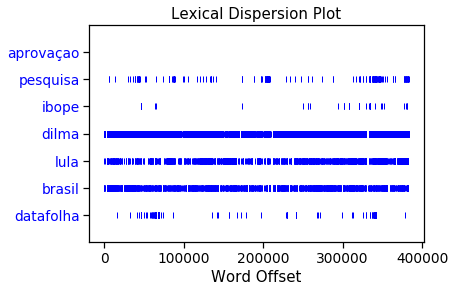

In [ ]:
text.dispersion_plot([u'aprovaçao', 
                      u'pesquisa',
                      u'ibope',
                      u'dilma',
                      u'lula',
                      u'brasil',
                      u'datafolha',
                      ])

Frases mais significativas dos tweets

In [ ]:
manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                          'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                          'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','Dilma','pictwittercom','dia','mil','pra',
                          'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
        'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
        'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog', '@','"','...']
stop_words = stopwords.words('portuguese')
for i in manual_list_stop_words:
    stop_words.append(i)

In [ ]:
def score_sentences(sentences, important_words):
    
    CLUSTER_THRESHOLD = 5  
    scores = []
    sentence_idx = -1
   
    for s in [word_tokenize(s) for s in sentences]:    
        sentence_idx += 1
        word_idx = []
        
        for w in important_words:
            try:
              
                word_idx.append(s.index(w))
            except ValueError, e: # w not in this particular sentence
                pass
        word_idx.sort()
     
        if len(word_idx)== 0: continue
        
        clusters = []
        cluster = [word_idx[0]]
        i = 1
        while i < len(word_idx):
            if word_idx[i] - word_idx[i - 1] < CLUSTER_THRESHOLD:
                cluster.append(word_idx[i])
            else:
                clusters.append(cluster[:])
                cluster = [word_idx[i]]
            i += 1
        clusters.append(cluster)
   
        max_cluster_score = 0
        for c in clusters:
            significant_words_in_cluster = len(c)
            total_words_in_cluster = c[-1] - c[0] + 1
            score = 1.0 * significant_words_in_cluster \
                * significant_words_in_cluster / total_words_in_cluster
            if score > max_cluster_score:
                max_cluster_score = score
        scores.append((sentence_idx, score))
    return scores

In [ ]:
def summarize(txt):
    TOP_SENTENCES = 10  
    N = 100  
   
    sentences = [s for s in word_tokenize(txt)]
    normalized_sentences = [s.lower() for s in sentences]
    words = [w.lower() for sentence in normalized_sentences for w in nltk.tokenize.word_tokenize(sentence)]
    fdist = nltk.FreqDist(words)
    top_n_words = [w[0] for w in fdist.items() if w[0] not in stop_words][:N]
    scored_sentences = score_sentences(normalized_sentences, top_n_words)

    avg = np.mean([s[1] for s in scored_sentences])
    std = np.std([s[1] for s in scored_sentences])
    mean_scored = [(sent_idx, score) for (sent_idx, score) in scored_sentences
                   if score > avg + 0.5 * std]
 
    top_n_scored = sorted(scored_sentences, key=lambda s: s[1])[-TOP_SENTENCES:]
    top_n_scored = sorted(top_n_scored, key=lambda s: s[0])
   
    return dict(top_n_summary=[sentences[idx] for (idx, score) in top_n_scored],
                mean_scored_summary=[sentences[idx] for (idx, score) in mean_scored])

In [ ]:
sumarios = summarize(texto_sem_tags)
sumarios['top_n_summary'] = set(sumarios['top_n_summary'])
sumarios['mean_scored_summary'] = set(sumarios['mean_scored_summary'])

print(u'palavras mais importantes(1):\n')
for s in sumarios['top_n_summary']:
    print(u'{}\n'.format(s))
    


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


palavras mais importantes(1):

//twittercom/cguonline

espacinho

igual

revistaforum

thenewyorktimes

controverso

destruir

rapidamente

